
--- Exploration de Unemployment in India.csv ---

Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB

Premières lignes du DataFrame:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra P

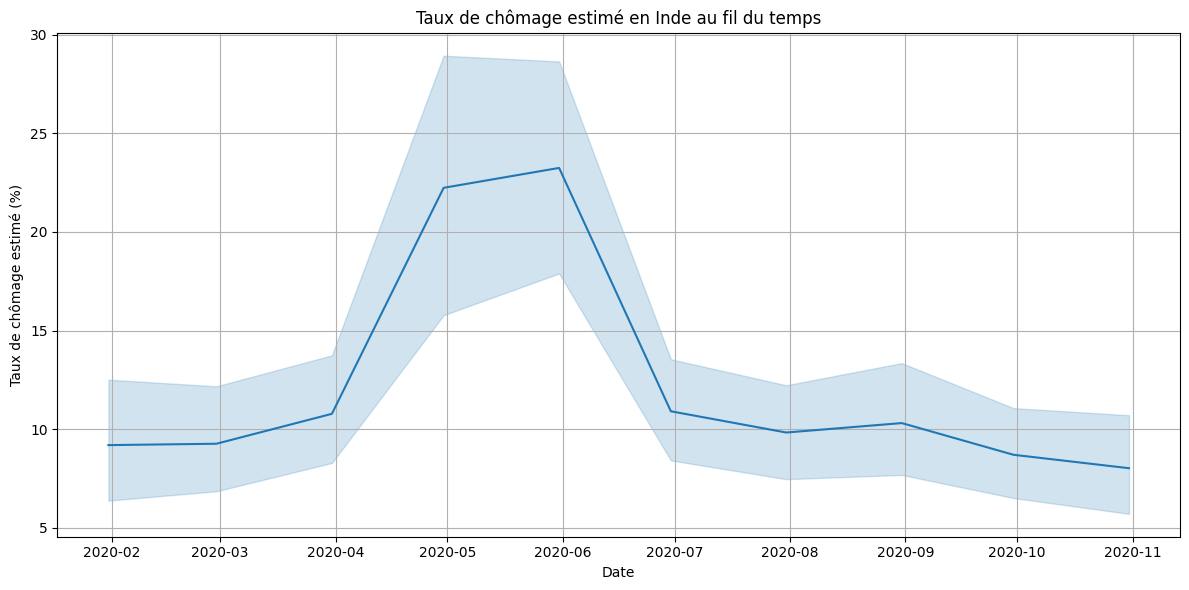

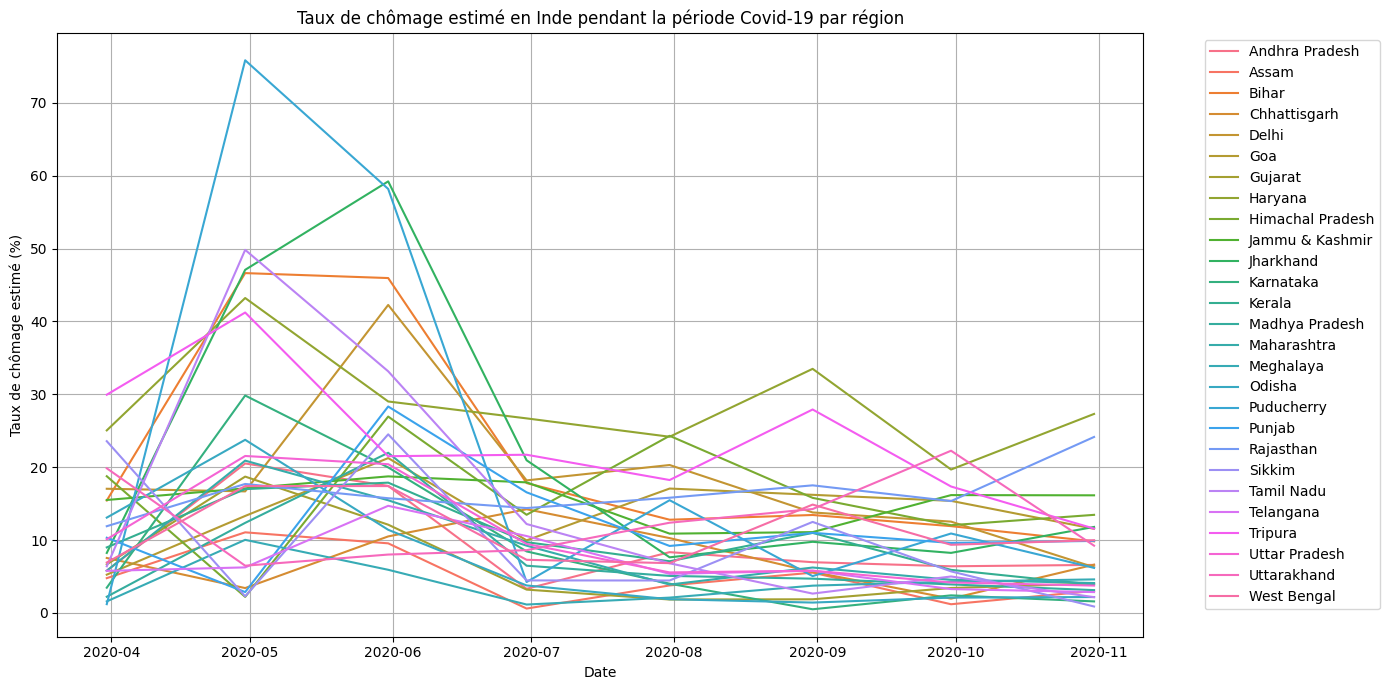

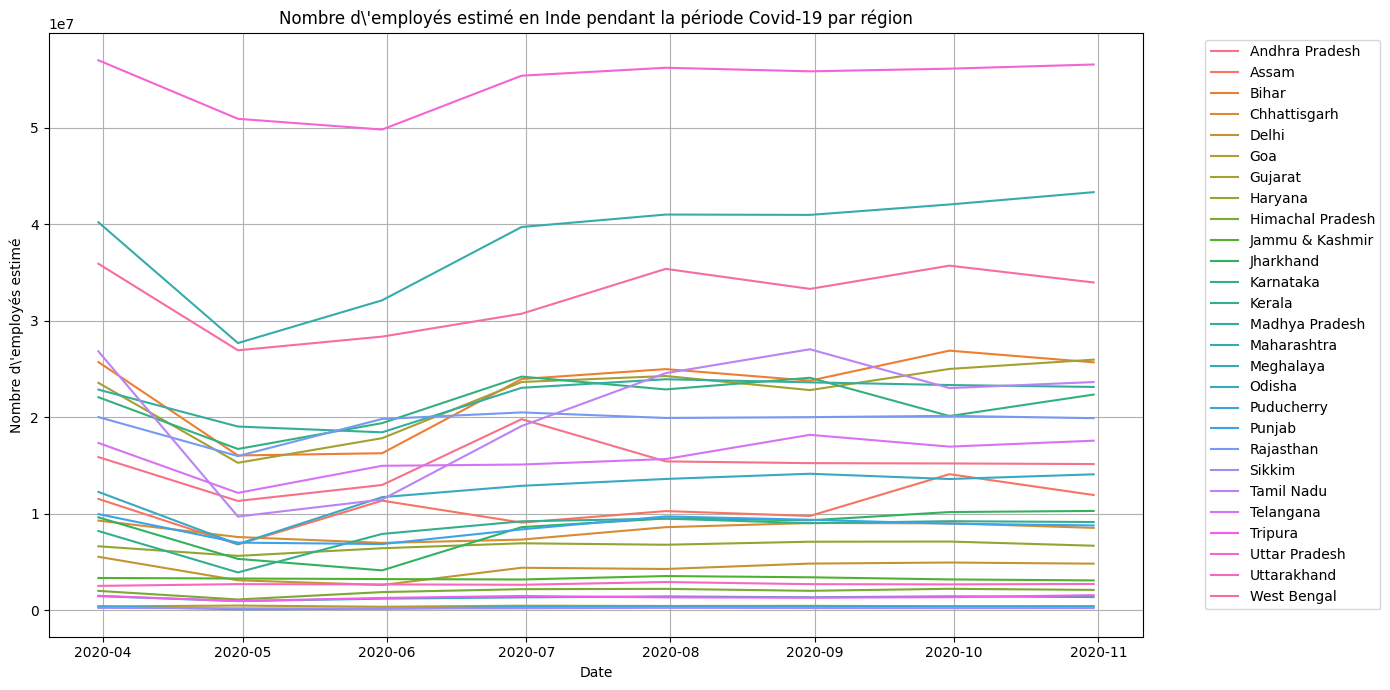

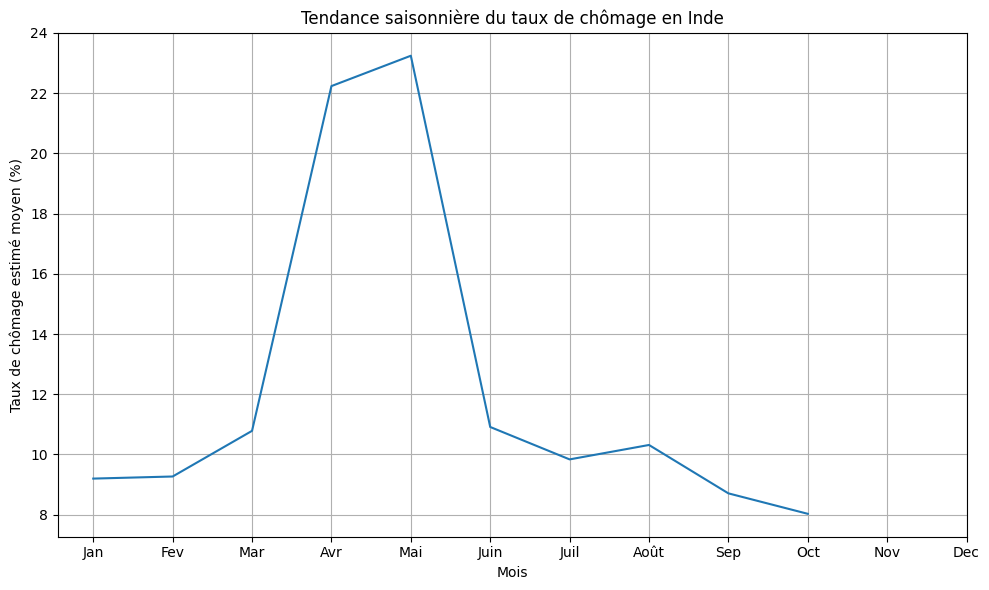

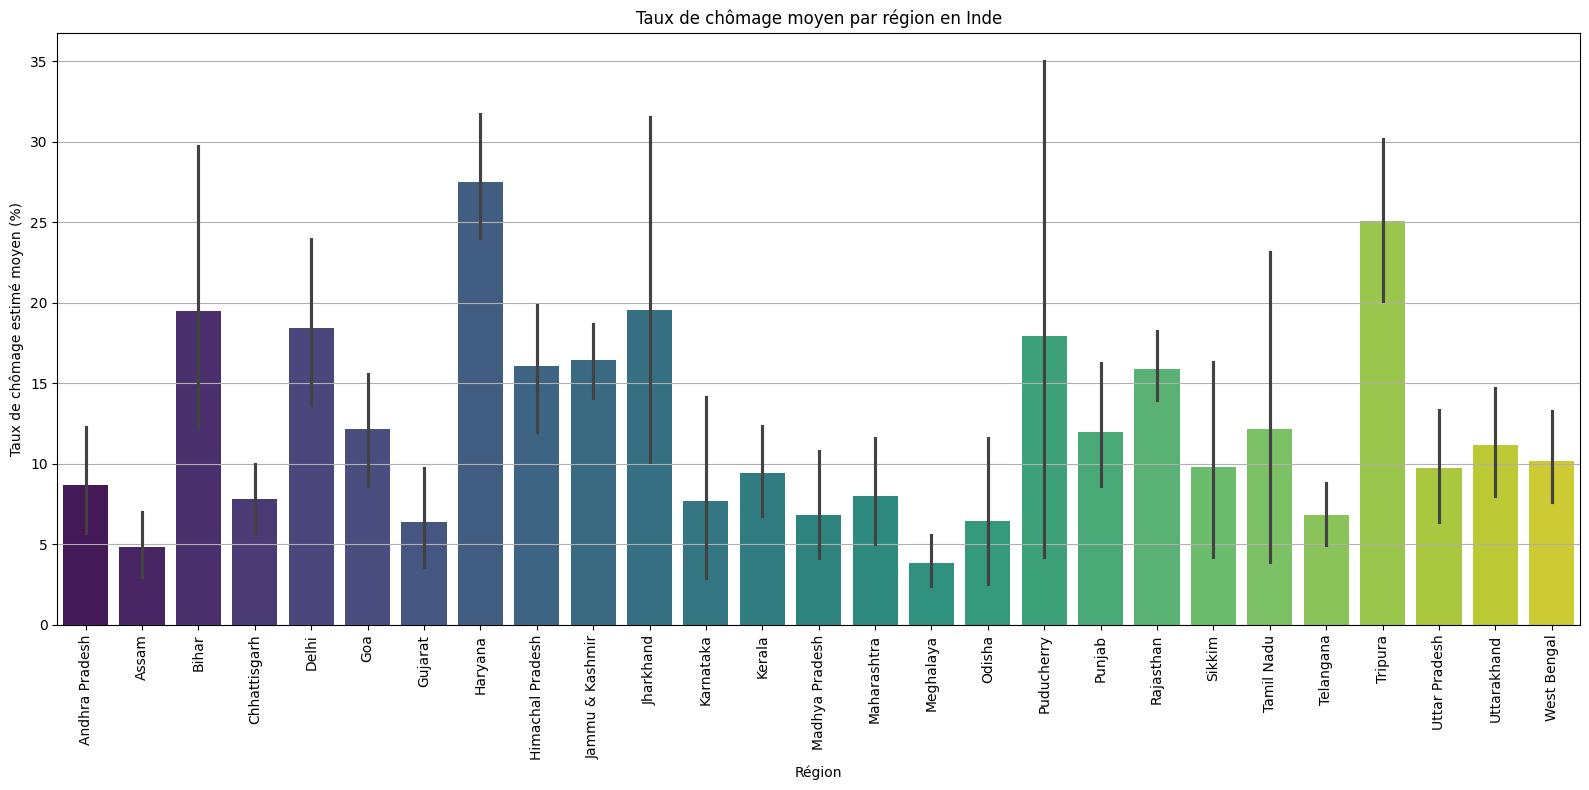

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#chargement des données
df_india = pd.read_csv("Unemployment in India.csv")
df_rate = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
    
# Nettoyage et exploration initiale des données pour df_india
print("""\n--- Exploration de Unemployment in India.csv ---\n""")
print("Informations sur le DataFrame:")
df_india.info()
print("""\nPremières lignes du DataFrame:""")
print(df_india.head())
print("""\nStatistiques descriptives:""")
print(df_india.describe())

# Nettoyage des noms de colonnes (supprimer les espaces et caractères spéciaux)
df_india.columns = df_india.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("%", "percent")
print("""\nNoms de colonnes nettoyés pour df_india:""")
print(df_india.columns)

# Convertir la colonne \'Date\' en datetime
df_india["Date"] = pd.to_datetime(df_india["Date"], dayfirst=True)

# Nettoyage et exploration initiale des données pour df_rate
print("""\n--- Exploration de Unemployment_Rate_upto_11_2020.csv ---\n""")
print("Informations sur le DataFrame:")
df_rate.info()
print("""\nPremières lignes du DataFrame:""")
print(df_rate.head())
print("""\nStatistiques descriptives:""")
print(df_rate.describe())

# Nettoyage des noms de colonnes (supprimer les espaces et caractères spéciaux)
df_rate.columns = df_rate.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("%", "percent")
print("""\nNoms de colonnes nettoyés pour df_rate:""")
print(df_rate.columns)

# Convertir la colonne \'Date\' en datetime
df_rate["Date"] = pd.to_datetime(df_rate["Date"], dayfirst=True)

# Vérifier les valeurs manquantes
print("""\nValeurs manquantes dans df_india:""")
print(df_india.isnull().sum())
print("""\nValeurs manquantes dans df_rate:""")
print(df_rate.isnull().sum())

# Visualisation de base (exemple)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rate, x="Date", y="Estimated_Unemployment_Rate_percent")
plt.title("Taux de chômage estimé en Inde au fil du temps")
plt.xlabel("Date")
plt.ylabel("Taux de chômage estimé (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("unemployment_rate_time_series.png")
print("""\nGraphique du taux de chômage enregistré dans unemployment_rate_time_series.png""")




# Analyse de l\\\'impact du Covid-19

# Filtrer les données pour la période Covid-19 (par exemple, de mars 2020 à novembre 2020)
df_covid = df_rate[(df_rate["Date"] >= "2020-03-01") & (df_rate["Date"] <= "2020-11-30")]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_covid, x="Date", y="Estimated_Unemployment_Rate_percent", hue="Region")
plt.title("Taux de chômage estimé en Inde pendant la période Covid-19 par région")
plt.xlabel("Date")
plt.ylabel("Taux de chômage estimé (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("unemployment_covid_impact_by_region.png")
print("""\nGraphique de l\\\'impact du Covid-19 sur le chômage par région enregistré dans unemployment_covid_impact_by_region.png""")

# Visualisation de l\\\'impact du Covid-19 sur l\\\'emploi
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_covid, x="Date", y="Estimated_Employed", hue="Region")
plt.title("Nombre d\\\'employés estimé en Inde pendant la période Covid-19 par région")
plt.xlabel("Date")
plt.ylabel("Nombre d\\\'employés estimé")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("employment_covid_impact_by_region.png")
print("""\nGraphique de l\\\'impact du Covid-19 sur l\\\'emploi par région enregistré dans employment_covid_impact_by_region.png""")

# Identification des tendances saisonnières et patterns

# Agréger les données par mois pour identifier les tendances saisonnières
df_rate["Month"] = df_rate["Date"].dt.month
df_monthly_avg = df_rate.groupby("Month")["Estimated_Unemployment_Rate_percent"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_monthly_avg, x="Month", y="Estimated_Unemployment_Rate_percent")
plt.title("Tendance saisonnière du taux de chômage en Inde")
plt.xlabel("Mois")
plt.ylabel("Taux de chômage estimé moyen (%)")
plt.xticks(range(1, 13), ["Jan", "Fev", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.tight_layout()
plt.savefig("unemployment_seasonal_trend.png")
print("""\nGraphique de la tendance saisonnière du chômage enregistré dans unemployment_seasonal_trend.png""")

# Analyse des patterns par région
plt.figure(figsize=(16, 8))
sns.barplot(data=df_rate, x="Region", y="Estimated_Unemployment_Rate_percent", palette="viridis")
plt.title("Taux de chômage moyen par région en Inde")
plt.xlabel("Région")
plt.ylabel("Taux de chômage estimé moyen (%)")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("unemployment_by_region.png")
print("""\nGraphique du taux de chômage par région enregistré dans unemployment_by_region.png""")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4bdd7e7b-c94f-4baa-a899-3f25d0448f82' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>